# 1 - PROJECT ENVIRONMENT

# Cloning project repository

In [1]:
# Cloning my project "Industrial Steel Surface Defect Detection"
!git clone https://github.com/rlucendo/surface-defect-detection.git
%cd surface-defect-detection
!ls -F

Cloning into 'surface-defect-detection'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 41 (delta 13), reused 33 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (41/41), 23.22 KiB | 7.74 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/surface-defect-detection
ARCHITECTURE.md  README.md  requirements.txt  src/


# Installing requirements

In [2]:
# Installing library requirements
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.1 MB/s eta 0:00:00


# 2 - DATASET

In [3]:
import os
import shutil
import glob

# 1 DOWNLOADING THE DATASET "NEU-surface-defect-database" FROM GOOGLE DRIVE (No token needed)
print("Preparing environment...")
!pip install gdown > /dev/null
import gdown

FILE_ID = '1X4RNEcL33kC57IWSiBqsV7lw96V8j3Pv'
URL = f'https://drive.google.com/uc?id={FILE_ID}'

# 2 CLEAN UP AND UNZIP
raw_dir = "data/raw"
if os.path.exists(raw_dir):
    shutil.rmtree(raw_dir)
os.makedirs(raw_dir, exist_ok=True)

zip_path = os.path.join(raw_dir, "dataset.zip")

print(f"Downloading dataset to {raw_dir}...")
# Downloading the file
gdown.download(URL, zip_path, quiet=False)

print("Unzipping dataset...")
# Silent unzip (-q)
!unzip -q {zip_path} -d {raw_dir}

# Removing the .zip file to free disk space in Colab
if os.path.exists(zip_path):
    os.remove(zip_path)

# 3 PROCESSING DATA
# Looking for the location of the folders IMAGES and ANNOTATIONS
found_folders = False
for root, dirs, files in os.walk(raw_dir):
    if "IMAGES" in dirs and "ANNOTATIONS" in dirs:
        # If not in the root folder, moving them to it
        if root != raw_dir:
            print(f"Realocating files from {root}...")
            # Moving content
            shutil.move(os.path.join(root, "IMAGES"), os.path.join(raw_dir, "IMAGES"))
            shutil.move(os.path.join(root, "ANNOTATIONS"), os.path.join(raw_dir, "ANNOTATIONS"))

            # Cleaning up the intermediate folders now empty (like NEU-DET)
            # Just if the root isn't data/raw
            try:
                shutil.rmtree(root)
            except:
                pass
        found_folders = True
        break

if found_folders:
    print("\nPROCESS COMPLETED SUCCESSFULLY")
    print("Final content of  data/raw:")
    !ls -F data/raw
else:
    print("\nWARNING: Unexpected struture. Check the downloaded data:")
    !ls -R data/raw

Preparing environment...


Downloading...
From (original): https://drive.google.com/uc?id=1X4RNEcL33kC57IWSiBqsV7lw96V8j3Pv
From (redirected): https://drive.google.com/uc?id=1X4RNEcL33kC57IWSiBqsV7lw96V8j3Pv&confirm=t&uuid=75b1e970-7c19-4ada-9aea-a17e5cc417ed
To: /content/surface-defect-detection/data/raw/dataset.zip
100%|██████████| 27.6M/27.6M [00:00<00:00, 43.5MB/s]


Unzipping dataset...
Realocating files from data/raw/NEU-DET...

PROCESS COMPLETED SUCCESSFULLY
Final content of  data/raw:
ANNOTATIONS/  IMAGES/


# Preparing dataset

In [4]:
!python src/prepare_data.py

Starting dataset organization from /content/surface-defect-detection/data/raw/ANNOTATIONS...

Processing complete.
Successfully organized: 1800 images.
Errors encountered: 0
Data is ready at: /content/surface-defect-detection/data/processed


# Dataset sample

Generating class mosaic...


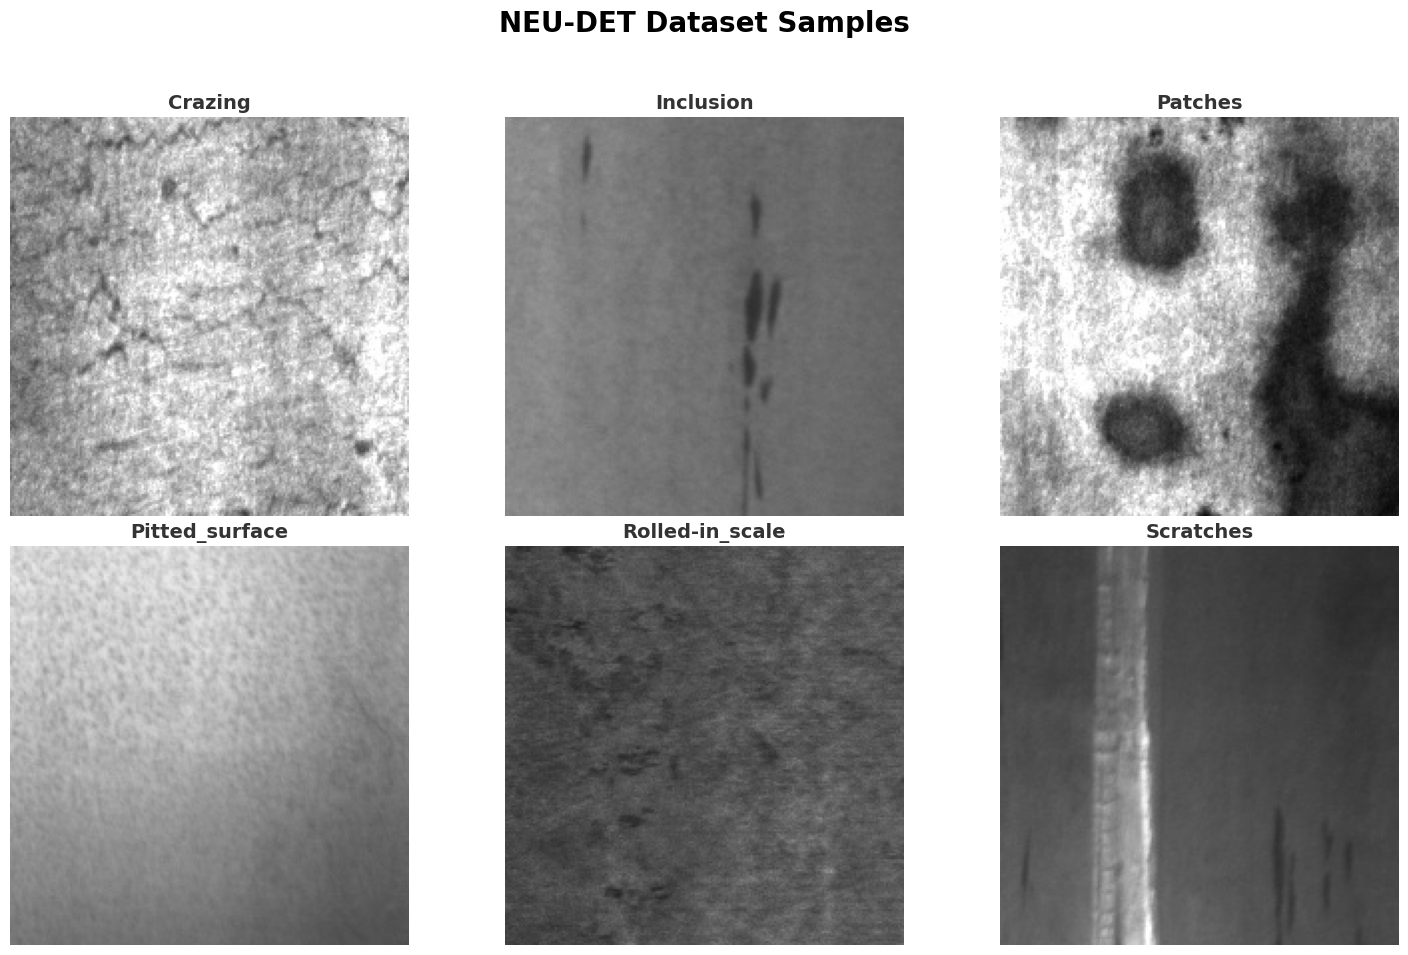

Image generated: classes_preview.png


In [5]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Configuration
processed_dir = "data/processed"
output_filename = "classes_preview.png"
classes = sorted(os.listdir(processed_dir))  # Automatically read classes

# Set up the plot (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('NEU-DET Dataset Samples', fontsize=20, weight='bold')

# Flatten the axes for easy iteration (from 2x3 matrix to list of 6)
axes = axes.flatten()

print("Generating class mosaic...")

for i, class_name in enumerate(classes):
    if i >= 6: break  # Safety check, only process the first 6

    class_dir = os.path.join(processed_dir, class_name)

    # Pick a random image from that class
    if os.path.exists(class_dir):
        images = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.bmp', '.png'))]
        if images:
            random_img = random.choice(images)
            img_path = os.path.join(class_dir, random_img)

            # Load and show
            img = Image.open(img_path).convert("RGB")
            axes[i].imshow(img, cmap='gray')

            # Cosmetic
            axes[i].set_title(class_name.capitalize(), fontsize=14, weight='bold', color='#333333')
            axes[i].axis('off')  # Removing numeric axis

            # Adding a soft border to each picture
            for spine in axes[i].spines.values():
                spine.set_edgecolor('#ddd')
                spine.set_linewidth(2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adding some margin to avoid collisions
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
plt.show()

print(f"Image generated: {output_filename}")

# 3 - TRAINING

In [6]:
!python src/train.py

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100% 44.7M/44.7M [00:01<00:00, 46.8MB/s]

--- Epoch 1/20 ---
Epoch [0][0/45] Loss: 2.0923 Acc: 9.38%
Epoch [0][10/45] Loss: 0.3263 Acc: 84.38%
Epoch [0][20/45] Loss: 0.0314 Acc: 100.00%
Epoch [0][30/45] Loss: 0.2150 Acc: 90.62%
Epoch [0][40/45] Loss: 0.2149 Acc: 93.75%
--> VALIDATION Loss: 0.8359 Acc: 83.89%
--> Guardado Nuevo Mejor Modelo: /content/surface-defect-detection/models/model_best.pth

--- Epoch 2/20 ---
Epoch [1][0/45] Loss: 0.4407 Acc: 87.50%
Epoch [1][10/45] Loss: 0.1419 Acc: 93.75%
Epoch [1][20/45] Loss: 0.0412 Acc: 100.00%
Epoch [1][30/45] Loss: 0.2557 Acc: 87.50%
Epoch [1][40/45] Loss: 0.1961 Acc: 90.62%
--> VALIDATION Loss: 6.8396 Acc: 32.78%

--- Epoch 3/20 ---
Epoch [2][0/45] Loss: 0.0301 Acc: 100.00%
Epoch [2][10/45] Loss: 0.0695 Acc: 96.88%
Epoch [2][20/45] Loss: 0.0892 Acc: 96.88%
Epoch [2][30/45] Loss: 0.2093 Acc: 90.62%
Epoch [2][

# Downloading the best trained model

In [7]:
from google.colab import files
import os

# Check if it exists
if os.path.exists('models/model_best.pth'):
    print("Downloading the best model...")
    files.download('models/model_best.pth')
else:
    print("Model not found. Check the models/ folder")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4 - VALIDATION

# Simple inference test

In [8]:
# Choose a test image (for example, a 'scratch')
import os
import random

# Look for a real image in our processed data
test_class = "scratches"
test_dir = f"data/processed/{test_class}"
random_image = random.choice(os.listdir(test_dir))
image_path = os.path.join(test_dir, random_image)

print(f"Testing with real image: {image_path}")

# Run the inference script
!python src/inference.py --image "{image_path}" --model "models/model_best.pth"

Testing with real image: data/processed/scratches/scratches_76.jpg
{'filename': 'scratches_76.jpg', 'prediction': 'scratches', 'confidence': 0.9993}


# Confusion matrix

Generating confusion matrix...


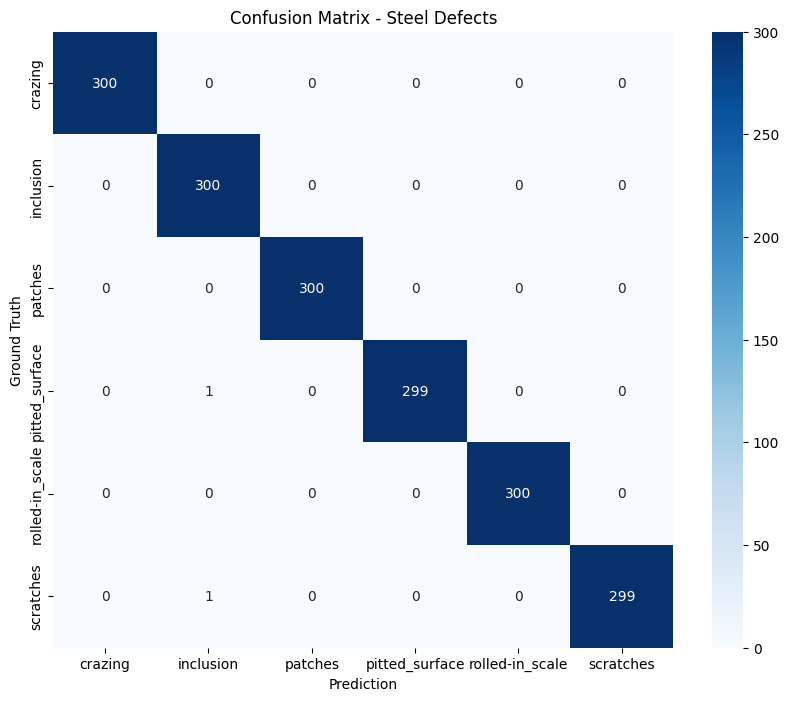

                 precision    recall  f1-score   support

        crazing       1.00      1.00      1.00       300
      inclusion       0.99      1.00      1.00       300
        patches       1.00      1.00      1.00       300
 pitted_surface       1.00      1.00      1.00       300
rolled-in_scale       1.00      1.00      1.00       300
      scratches       1.00      1.00      1.00       300

       accuracy                           1.00      1800
      macro avg       1.00      1.00      1.00      1800
   weighted avg       1.00      1.00      1.00      1800



In [9]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from src.dataset import SteelSurfaceDataset
from src.model import get_model
from src.config import *
from torch.utils.data import DataLoader
from torchvision import transforms

# 1 Load validation data
transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
dataset = SteelSurfaceDataset(root_dir=os.path.join(DATA_DIR, "processed"), transform=transform)
# Using a small subset for evaluation
loader = DataLoader(dataset, batch_size=32, shuffle=False)

# 2 Load model
model = get_model(num_classes=len(CLASSES))
checkpoint = torch.load('models/model_best.pth', map_location=DEVICE)
model.load_state_dict(checkpoint['state_dict'])
model.to(DEVICE)
model.eval()

# 3 Predict
all_preds = []
all_labels = []

print("Generating confusion matrix...")
with torch.no_grad():
    for images, labels in loader:
        images = images.to(DEVICE)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

# 4 Plot
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES, cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.title('Confusion Matrix - Steel Defects')
plt.show()

print(classification_report(all_labels, all_preds, target_names=CLASSES))

In [10]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44285 sha256=07a88bf4e8d2a83893ed75fcde88ffc997bf3424c2c47f5cd3fc9b811e3d1781
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


# Gard-CAM test


=== CLASSIFICATION REPORT ===
                 precision    recall  f1-score   support

        crazing       1.00      1.00      1.00       300
      inclusion       0.99      1.00      1.00       300
        patches       1.00      1.00      1.00       300
 pitted_surface       1.00      1.00      1.00       300
rolled-in_scale       1.00      1.00      1.00       300
      scratches       1.00      1.00      1.00       300

       accuracy                           1.00      1800
      macro avg       1.00      1.00      1.00      1800
   weighted avg       1.00      1.00      1.00      1800


=== EXPLAINABILITY DASHBOARD (Grad-CAM) ===


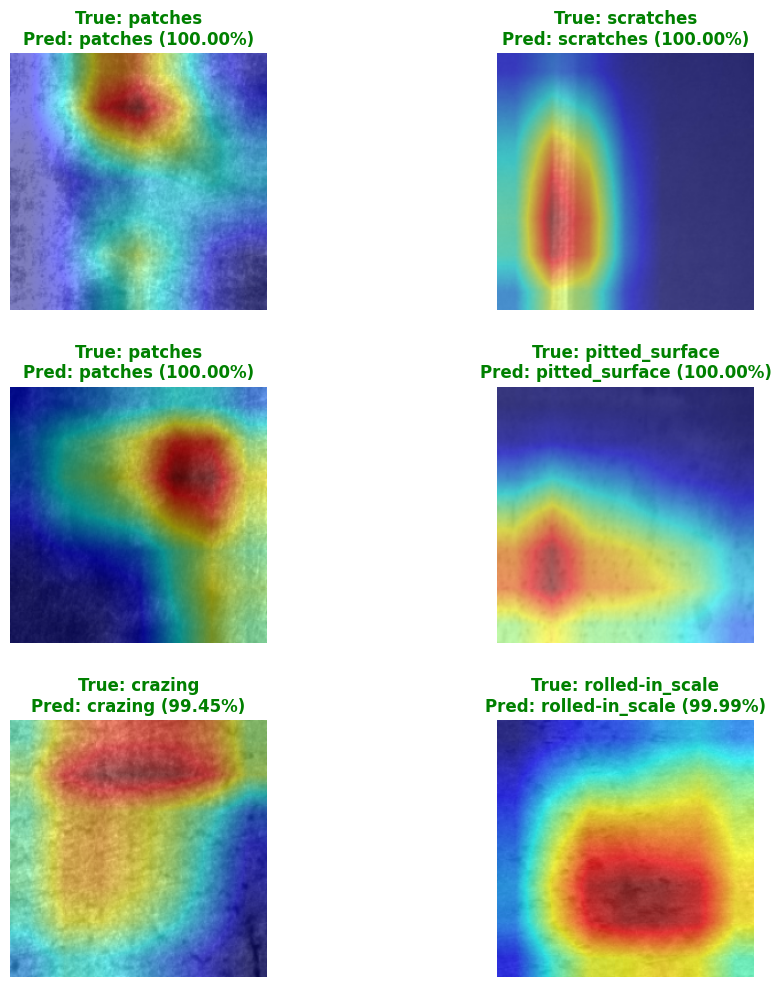

In [11]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from src.dataset import SteelSurfaceDataset
from src.model import get_model
from src.config import *
from torch.utils.data import DataLoader
from torchvision import transforms

# 1 CONFIGURATION
# Using the saved model
model = get_model(num_classes=len(CLASSES))
checkpoint = torch.load('models/model_best.pth', map_location=DEVICE)
model.load_state_dict(checkpoint['state_dict'])
model.to(DEVICE)
model.eval()

# Defining the target layer for Grad-CAM (usually the last conv layer of ResNet)
# In ResNet18, it is typically model.layer4[-1]
target_layers = [model.layer4[-1]]
cam = GradCAM(model=model, target_layers=target_layers)

# Validation dataset
transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
dataset = SteelSurfaceDataset(root_dir=os.path.join(DATA_DIR, "processed"), transform=transform)
loader = DataLoader(dataset, batch_size=1, shuffle=True) # Batch size 1 for easy visualization

# 2 GENERATE NUMERICAL METRICS
print("\n=== CLASSIFICATION REPORT ===")
y_true = []
y_pred = []

# Iterate quickly to get metrics (use a subset or everything if performance allows)
# For the demo, we will generate a quick report from 100 samples or the full loader
temp_loader = DataLoader(dataset, batch_size=32, shuffle=False)
with torch.no_grad():
    for images, labels in temp_loader:
        images = images.to(DEVICE)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print(classification_report(y_true, y_pred, target_names=CLASSES))

# 3 PRO GRAD-CAM VISUALIZATION
print("\n=== EXPLAINABILITY DASHBOARD (Grad-CAM) ===")

def denormalize(tensor):
    """Reverses normalization to display the original image"""
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = tensor.permute(1, 2, 0).numpy()
    img = std * img + mean
    img = np.clip(img, 0, 1)
    return img

# Plot 3 rows x 2 columns
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
axes = axes.flatten()

for i, (image_tensor, label_idx) in enumerate(loader):
    if i >= 6: break # Only show 6 examples

    # 1. Inference
    input_tensor = image_tensor.to(DEVICE)
    outputs = model(input_tensor)
    probs = torch.nn.functional.softmax(outputs, dim=1)
    conf, pred_idx = torch.max(probs, 1)

    pred_label = CLASSES[pred_idx.item()]
    true_label = CLASSES[label_idx.item()]
    confidence = conf.item()

    # 2. Grad-CAM
    # Specific targets required. If None, it targets the highest scoring class
    targets = [ClassifierOutputTarget(pred_idx.item())]
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]

    # Prepare base image
    rgb_img = denormalize(image_tensor[0])
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    # 3. Display
    ax = axes[i]
    ax.imshow(visualization)

    # Title color: Green if correct, Red if incorrect
    color = 'green' if pred_label == true_label else 'red'

    title = f"True: {true_label}\nPred: {pred_label} ({confidence:.2%})"
    ax.set_title(title, color=color, fontsize=12, fontweight='bold')
    ax.axis('off')

plt.show()

# t-SNE calculation

--- Preparing t-SNE Environment (Robust Mode) ---
Extracting features...
Muestras recolectadas: 160
Calculating t-SNE with perplexity=30...


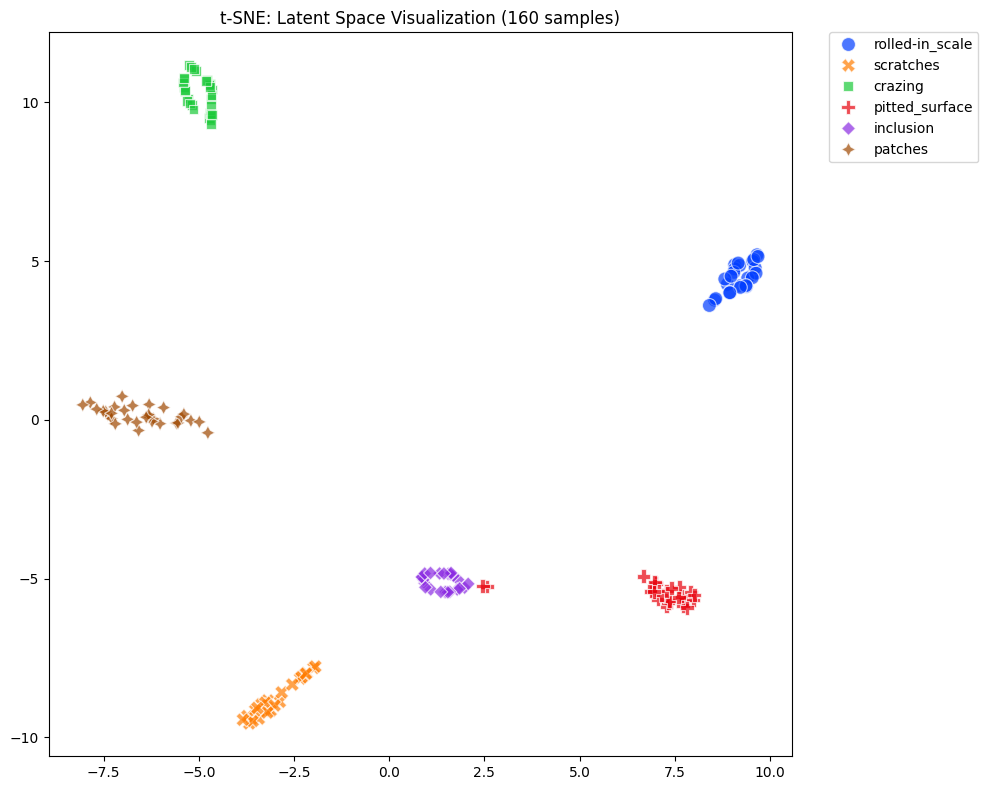

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import os
import sys
from torch.utils.data import DataLoader
from torchvision import transforms

# Ensure Python finds your src modules
if "src" not in sys.path:
    sys.path.append(os.path.abspath("src"))

from src.dataset import SteelSurfaceDataset
from src.config import *
from src.model import get_model

print("--- Preparing t-SNE Environment (Robust Mode) ---")

# 1. Re-create the Val Loader
val_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset_path = os.path.join(DATA_DIR, "processed")

# Safety check: Does the data exist?
if not os.path.exists(dataset_path):
    print(f"CRITICAL ERROR: Folder not found at {dataset_path}")
else:
    dataset = SteelSurfaceDataset(root_dir=dataset_path, transform=val_transform)
    # Standard batch size of 32
    val_loader = DataLoader(dataset, batch_size=32, shuffle=True)

    # 2. Load the model
    model = get_model(num_classes=len(CLASSES))
    checkpoint_path = 'models/model_best.pth'

    if os.path.exists(checkpoint_path):
        checkpoint = torch.load(checkpoint_path, map_location=DEVICE)
        # Check if the checkpoint contains 'state_dict' or is the model itself
        if 'state_dict' in checkpoint:
            model.load_state_dict(checkpoint['state_dict'])
        else:
            model.load_state_dict(checkpoint)

        model.to(DEVICE)
        model.eval()

        # 3. Feature Extraction
        print("Extracting features...")
        features_list = []
        labels_list = []

        # Hook to capture the output of the penultimate layer (avgpool)
        def hook_fn(module, input, output):
            # Flatten and move to CPU
            features_list.append(output.flatten(start_dim=1).detach().cpu().numpy())

        # Register the hook on ResNet's avgpool layer
        handle = model.avgpool.register_forward_hook(hook_fn)

        with torch.no_grad():
            total_samples = 0
            # Target at least 150 samples for a better-looking plot
            TARGET_SAMPLES = 150

            for i, (images, labels) in enumerate(val_loader):
                images = images.to(DEVICE)
                model(images) # This triggers the hook

                # Store real labels (convert tensor to strings)
                labels_cpu = labels.cpu().numpy()
                labels_list.extend([CLASSES[l] for l in labels_cpu])

                total_samples += len(labels_cpu)
                if total_samples >= TARGET_SAMPLES:
                    break

        handle.remove() # Clean up the hook
        print(f"Muestras recolectadas: {total_samples}")

        if total_samples > 1:
            # 4. Calculate t-SNE
            # Stack the list of arrays into a single large numpy array
            features = np.vstack(features_list)

            # --- MATHEMATICAL CORRECTION ---
            # Perplexity must be less than the number of samples.
            # Default to 30, but if samples are low, set to n_samples - 1
            safe_perplexity = min(30, total_samples - 1)
            if safe_perplexity < 1: safe_perplexity = 1

            print(f"Calculating t-SNE with perplexity={safe_perplexity}...")

            tsne = TSNE(n_components=2, random_state=42, perplexity=safe_perplexity, init='pca', learning_rate='auto')
            features_2d = tsne.fit_transform(features)

            # 5. Plot
            plt.figure(figsize=(10, 8))
            sns.scatterplot(
                x=features_2d[:,0], y=features_2d[:,1],
                hue=labels_list,
                palette=sns.color_palette("bright", len(set(labels_list))), # Adjust palette to actual number of classes found
                style=labels_list,
                s=100, alpha=0.7
            )
            plt.title(f"t-SNE: Latent Space Visualization ({total_samples} samples)")
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            plt.tight_layout()
            plt.show()
        else:
            print("Not enough data collected to generate the plot.")

    else:
        print(f"Model not found at {checkpoint_path}")

# 5 - APPLICATION TEST

# Live sample test

In [18]:
import sys
import os
import io
import torch
import torch.nn.functional as F
import ipywidgets as widgets
from IPython.display import display, clear_output, Image as IPyImage
from PIL import Image as PILImage

# Ensure the 'src' directory is in the Python path for module imports
if "src" not in sys.path:
    sys.path.append(os.path.abspath("src"))

from src.inference import DefectPredictor
from src.config import CLASSES, DEVICE

# 1 INITIALIZATION
model_path = "models/model_best.pth"

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model checkpoint not found at: {model_path}. Please train the model first.")

predictor = DefectPredictor(model_path)

# 2 UI COMPONENTS
header = widgets.HTML(
    value="<h3 style='color:#333; margin-bottom:5px;'>Steel Surface Defect Inspector</h3>"
          "<p style='color:#666; font-size:14px;'>Upload a surface image to analyze potential manufacturing defects.</p>"
)

upload_btn = widgets.FileUpload(
    accept='image/*',
    multiple=False,
    description='Upload Image',
    button_style='',
    layout=widgets.Layout(width='200px')
)

out_image = widgets.Output()
out_results = widgets.Output()

# 3 INFERENCE LOGIC
def process_upload(change):
    """
    Callback function triggered when a user uploads an image.
    Processes the image, runs inference, and updates the UI outputs.
    """
    out_image.clear_output()
    out_results.clear_output()

    if not upload_btn.value:
        return

    try:
        # Handle API differences between ipywidgets 7.x and 8.x
        if isinstance(upload_btn.value, tuple):
            uploaded_file = upload_btn.value[0]
            content = uploaded_file['content']
            name = uploaded_file['name']
        else:
            name = list(upload_btn.value.keys())[0]
            content = upload_btn.value[name]['content']

        # Render the uploaded image
        with out_image:
            display(IPyImage(content, width=350))

        # Run inference
        with out_results:
            print(f"Analyzing: {name}...\n")

            # Convert raw bytes to PIL Image (RGB format required by ResNet)
            pil_img = PILImage.open(io.BytesIO(content)).convert('RGB')

            # Apply transformations and add batch dimension
            img_tensor = predictor.transform(pil_img).unsqueeze(0).to(DEVICE)

            with torch.no_grad():
                outputs = predictor.model(img_tensor)
                probabilities = F.softmax(outputs, dim=1)[0]

            # Map probabilities to class names and sort descending
            prob_dict = {CLASSES[i]: float(probabilities[i]) for i in range(len(CLASSES))}
            sorted_probs = sorted(prob_dict.items(), key=lambda x: x[1], reverse=True)

            # Print formatted results
            print("-" * 30)
            print("INFERENCE RESULTS")
            print("-" * 30)

            top_class, top_prob = sorted_probs[0]
            print(f"PREDICTED CLASS: {top_class.upper()}")
            print(f"CONFIDENCE:      {top_prob:.2%}\n")

            print("Probability Breakdown:")
            for cls_name, prob in sorted_probs:
                if prob > 0.001:  # Filter out statistically insignificant probabilities
                    print(f"  {cls_name.ljust(15)} : {prob:.2%}")

    except Exception as e:
        with out_results:
            print(f"Error processing image: {str(e)}")

# 4 RENDER INTERFACE
upload_btn.observe(process_upload, names='value')

# Construct the layout
ui_layout = widgets.VBox([
    header,
    upload_btn,
    widgets.HBox(
        [out_image, out_results],
        layout=widgets.Layout(margin='20px 0px 0px 0px', grid_gap='40px')
    )
])

display(ui_layout)